In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Read Files

In [2]:
# normalized data, with GA effect
data = pd.read_csv("esetSC2_normalized.csv")

# data here is normalized, and the GA effect is removed.
#data = pd.read_csv("esetSC2_remove_effect.csv")

# data information
data_info = pd.read_csv('anoSC2_v20_nokey.csv')

# GA information
GA_info = pd.read_csv("allSamplesSC1and2.csv")

GA_infomation = GA_info.set_index("SampleID")
GA_infomation = GA_infomation.loc[data.columns]
data_infomation = data_info.reset_index().set_index("SampleID").drop(columns = 'index')
data_infomation = data_infomation.loc[data.columns]
data_infomation = data_infomation[(data_infomation['Group']=='Control') | (data_infomation['Group']=='sPTD')]
data = data[data_infomation.index]
data_copy = data

## Calculate the "similarity score" by t-test

In [3]:
control_sample = []
sPTD_sample = []
for i in data_infomation.index:
    if i in data.columns.values:
        if data_infomation.loc[[i]][['Group']].values[0][0] == 'Control':
            control_sample.append(i)
        if data_infomation.loc[[i]][['Group']].values[0][0] == 'sPTD':
            sPTD_sample.append(i)
sPTD_data = data[control_sample + sPTD_sample]

In [4]:
df = sPTD_data
df[['Control_mean', 'Control_std']] = df[control_sample].agg(['mean', 'std'], axis=1)
df[['sPTD_mean', 'sPTD_std']] = df[sPTD_sample].agg(['mean', 'std'], axis=1)
def welch_t_test(row):
    return (
        (row['Control_mean'] - row['sPTD_mean']) / 
        np.sqrt(row['Control_std']/len(control_sample) + row['sPTD_std']/len(sPTD_sample))
    )
df['similarity'] = df[['Control_mean', 'Control_std', 'sPTD_mean', 'sPTD_std']].apply(welch_t_test, axis=1)
df['similarity_abs'] = abs(df['similarity'])
df_sorted = df.sort_values('similarity_abs',ascending=False)
df_sorted.head()

,GSM1437801,GSM1437802,GSM1437803,GSM1437804,GSM1437805,GSM1437806,GSM1437807,GSM1437808,GSM1437811,GSM1437812,...,GSM1438095,GSM1438096,GSM1438107,GSM1438108,Control_mean,Control_std,sPTD_mean,sPTD_std,similarity,similarity_abs
28475_at,11.322398,11.371423,9.620767,9.969100,3.800785,3.540403,10.509662,10.316918,3.780313,4.379296,...,4.202430,3.581498,3.145328,3.912035,6.665341,3.141299,5.122581,2.932420,4.479229,4.479229
3050_at,8.879071,6.347740,6.238475,5.990726,7.169806,7.385648,4.316153,3.826996,4.926181,4.709023,...,3.229448,3.705809,4.527790,4.804481,5.984250,1.713695,5.008872,1.483875,3.962912,3.962912
5197_at,7.581048,6.645701,4.740281,5.356138,5.655771,6.330583,6.300591,7.055757,5.962009,6.589891,...,6.455163,5.991731,7.839872,7.895020,6.125164,0.931511,6.903123,0.981118,-3.931205,3.931205
28500_at,4.949823,4.703627,4.292975,4.893168,3.546381,3.490888,3.915671,3.550753,3.862815,3.062673,...,4.086527,3.773508,3.433177,3.564059,4.293050,0.988961,3.584442,0.857543,3.787539,3.787539
605_at,6.274101,5.888712,5.979242,6.107978,5.585784,6.126072,6.014727,6.027038,5.810342,4.858591,...,5.282953,5.711196,5.609727,5.296094,6.029294,0.387245,5.628993,0.281886,3.688076,3.688076


## Split the data into different GA Group

In [5]:
GA_values = np.unique(data_infomation.loc[df_sorted.columns[:-5]][['GA']].values)
GA_values = [x for x in GA_values if str(x) != 'nan']
data_infomation = data_infomation.loc[sPTD_data.columns]
df_dict_GA = {}
for key in GA_values:
    GA_samples = data_infomation.loc[data_infomation['GA']==key].index
    df_dict_GA[key] = GA_samples.tolist()   
df  = df_sorted.drop(columns=['Control_mean', 'Control_std', 'sPTD_mean', 'sPTD_std', 'similarity','similarity_abs'])
for key in df_dict_GA:
    df_dict_GA[key] = df[df_dict_GA[key]]
df_dict_GA[18.0].head()

,GSM1437803,GSM1437805,GSM1437815,GSM1437819,GSM1437821,GSM1437825,GSM1437832,GSM1437848,GSM1437858,GSM1437874,...,GSM1437975,GSM1438005,GSM1438009,GSM1438075,GSM1438083,GSM1438091,GSM1438093,GSM1438117,GSM1437860,GSM1437942
28475_at,9.620767,3.800785,10.895142,3.937772,7.438521,5.990114,10.018361,10.183065,11.057844,4.323696,...,4.269802,4.875915,4.162401,4.247471,5.332614,10.584073,10.535699,11.084548,10.462971,4.525280
3050_at,6.238475,7.169806,8.119800,7.056104,8.036401,7.185069,7.385280,4.987657,6.911133,7.068121,...,4.642108,4.764439,6.648793,7.831681,7.726399,6.920534,4.063750,7.444412,5.358038,5.656355
5197_at,4.740281,5.655771,5.436782,4.774203,6.577457,6.306888,4.720195,5.457427,6.869953,7.029460,...,6.009114,6.473614,6.179290,6.716264,6.757759,6.108619,4.647375,4.824728,5.733552,7.749138
28500_at,4.292975,3.546381,4.112949,3.761072,3.701051,5.988858,5.071667,4.641682,5.141964,5.295493,...,4.195952,3.673123,4.341101,4.961449,4.657471,4.829426,4.151632,5.710887,4.373327,4.399676
605_at,5.979242,5.585784,5.601141,6.559417,5.441374,6.046671,6.484537,5.831376,5.904022,6.218138,...,6.014393,6.119685,6.421013,6.774634,5.380939,6.343445,5.614135,6.806353,5.972251,5.374325


In [6]:
def SampleList_To_Group(sample_list, data_infomation = data_infomation):
    control_sample = []
    sPTD_sample = []
    for sample in sample_list:
        group = data_infomation.loc[[sample]][['Group']].values[0][0]
        if group == 'Control':
            control_sample.append(sample)
        if group == 'sPTD':
            sPTD_sample.append(sample)
    return control_sample,sPTD_sample

invalid_key = []
for key in df_dict_GA:
    control_sample,sPTD_sample = SampleList_To_Group(df_dict_GA[key])
    if len(control_sample)>0 and len(sPTD_sample)>0:
        df_dict_GA[key][['Control_mean', 'Control_std']] = df_dict_GA[key][control_sample].agg(['mean', 'std'], axis=1)
        df_dict_GA[key][['sPTD_mean', 'sPTD_std']] = df_dict_GA[key][sPTD_sample].agg(['mean', 'std'], axis=1)
        df_dict_GA[key]['similarity'] = df_dict_GA[key][['Control_mean', 'Control_std', 'sPTD_mean', 'sPTD_std']].apply(welch_t_test, axis=1)
        df_dict_GA[key]['similarity_abs'] = abs(df_dict_GA[key]['similarity'])
        df_dict_GA[key] = df_dict_GA[key].sort_values('similarity_abs',ascending=False)
    else:
        invalid_key.append(key)
for key in invalid_key:
    df_dict_GA.pop(key)
df_dict_GA[18.0].head()

,GSM1437803,GSM1437805,GSM1437815,GSM1437819,GSM1437821,GSM1437825,GSM1437832,GSM1437848,GSM1437858,GSM1437874,...,GSM1438093,GSM1438117,GSM1437860,GSM1437942,Control_mean,Control_std,sPTD_mean,sPTD_std,similarity,similarity_abs
170482_at,6.969672,7.944226,7.045512,7.779437,6.972526,8.061452,6.648407,5.998343,6.642612,7.160590,...,8.072885,6.738386,5.536220,5.578739,7.096932,0.707996,5.557479,0.030065,6.972584,6.972584
100885782_at,4.039741,5.222120,3.782562,3.913738,3.685795,4.086228,3.936799,2.722043,4.027647,3.838917,...,2.942499,3.876799,5.896168,6.143551,3.906121,0.498280,6.019860,0.174926,-6.338944,6.338944
101928185_at,2.724676,3.008580,2.774143,2.866446,2.809745,2.858403,3.108960,2.811985,2.845713,2.840242,...,2.716362,2.823878,3.670547,3.659391,2.923557,0.232255,3.664969,0.007889,-6.052787,6.052787
106480634_at,2.515600,2.795878,2.401961,2.428987,2.858254,2.387430,3.178391,2.121029,2.998800,2.434481,...,3.107163,2.614241,3.457865,3.456936,2.706833,0.320812,3.457401,0.000657,-6.008355,6.008355
374969_at,7.228575,9.858606,9.559795,7.968825,8.837036,7.217116,8.318444,6.583150,8.552898,9.723817,...,8.944823,6.919833,7.105181,7.085497,8.415926,1.068658,7.095339,0.013918,5.490657,5.490657


## Choose genes with high t-test score in different GA and all GAs

Select genes: local similarity >= 4 (in different GA) and global similarity >= 3 (in all GA)

In [7]:
gene_similarity = []
for key in df_dict_GA:
    df = df_dict_GA[key]
    gene = df.loc[df["similarity_abs"] >= 4].index.tolist()
    gene_similarity = gene_similarity + gene
gene = data_copy.loc[df_sorted["similarity_abs"] >= 3].index.tolist()
gene_similarity = gene_similarity + gene
gene_similarity = np.unique(gene_similarity)
print(len(gene_similarity))
print(gene_similarity)

84
['100033413_at' '100033430_at' '100049587_at' '100129361_at'
 '100506328_at' '100507387_at' '100616151_at' '100616187_at'
 '100885782_at' '101927547_at' '101928185_at' '101928548_at'
 '101928941_at' '101929128_at' '101929719_at' '102465501_at'
 '105369440_at' '105369832_at' '105372074_at' '105373105_at'
 '105373206_at' '105375752_at' '105376171_at' '105376314_at'
 '105376839_at' '105377384_at' '105377884_at' '105377885_at'
 '106480634_at' '107397392_at' '107984757_at' '107985007_at'
 '107985072_at' '107985411_at' '110091775_at' '112840_at' '1164_at'
 '1178_at' '122970_at' '133383_at' '140_at' '146850_at' '149069_at'
 '153478_at' '165829_at' '170482_at' '221421_at' '28423_at' '28475_at'
 '28500_at' '28503_at' '28522_at' '286016_at' '3050_at' '341_at'
 '374969_at' '400451_at' '401021_at' '4481_at' '51474_at' '51617_at'
 '5197_at' '5440_at' '5687_at' '5889_at' '605_at' '644511_at' '646508_at'
 '647859_at' '651_at' '692207_at' '6960_at' '7134_at' '722_at' '728441_at'
 '79015_at' '79854_

## Plot the relation of △GA and gene expression difference

In [8]:
data = data_copy.loc[gene_similarity]
individual_ID = np.unique(data_infomation['IndividualID'].values)
individual_ID = individual_ID[~np.isnan(individual_ID)]
individual_samples_dict = {}
for i in individual_ID:
    individual_samples_dict[i] = list(data_infomation[data_infomation['IndividualID']==i].index)

In [9]:
difference_list_3D = []
for i in individual_samples_dict.keys():
    sample = individual_samples_dict[i]
    df = data
    mean_value = data.values.mean()
    df = df[sample]
    df['Difference'] = abs(df[sample[0]] - df[sample[1]])/mean_value
    df  = df[['Difference']].transpose()
    df[['difference']] = df.agg(['mean'], axis=1)
    difference = df['difference'].values[0]
    GA1 = GA_infomation.loc[sample[0]].values[0]
    GA2 = GA_infomation.loc[sample[1]].values[0]
    difference_list_1 = [GA1, abs(GA1-GA2), difference]
    difference_list_2 = [GA2, abs(GA1-GA2), difference]
    difference_list_3D.append(difference_list_1)
    difference_list_3D.append(difference_list_2)
difference_list_2D = []
for i in individual_samples_dict.keys():
    sample = individual_samples_dict[i]
    df = data
    mean_value = data.values.mean()
    df = df[sample]
    df['Difference'] = abs(df[sample[0]] - df[sample[1]])/mean_value
    df  = df[['Difference']].transpose()
    df[['difference']] = df.agg(['mean'], axis=1)
    difference = df['difference'].values[0]
    GA1 = GA_infomation.loc[sample[0]].values[0]
    GA2 = GA_infomation.loc[sample[1]].values[0]
    difference_list_1 = [abs(GA1-GA2), difference]
    difference_list_2D.append(difference_list_1)

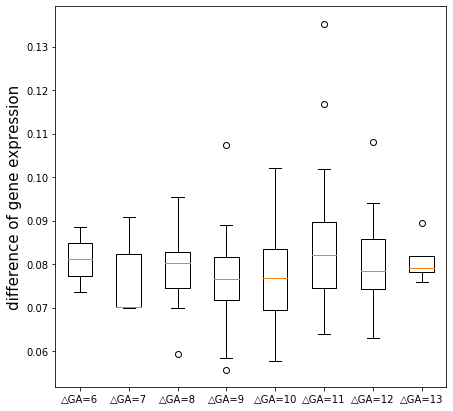

In [10]:
x = []
y = []
for i in difference_list_2D:
    x.append(i[0])
    y.append(i[1])
columns = list(np.unique(x))
data_boxplot = []
for i in columns:
    data_boxplot.append([])
for i in difference_list_2D:
    for j in range(len(columns)):
        if i[0] == columns[j]:
            data_boxplot[j].append(i[1])
for i in range(len(data_boxplot)):
    data_boxplot[i] = np.array(data_boxplot[i])
name_list = []
for i in range(len(columns)):
    name_list.append('△GA='+str(int(columns[i])))
name_list
plt.figure(figsize=(7,7))
plt.ylabel('difference of gene expression',fontsize=15)
plt.boxplot(data_boxplot,labels = name_list)
plt.show()

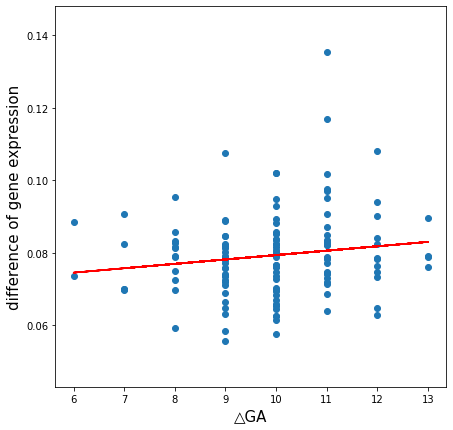

In [11]:
from sklearn import linear_model
x = []
y = []
for i in difference_list_2D:
    x.append([i[0]])
    y.append([i[1]])
model = linear_model.LinearRegression()
model.fit(x, y)
#intercept = list(model.intercept_)[0]
#coef = list(model.coef_[0])[0]
y2 = model.predict(x)
plt.figure(figsize=(7,7))
plt.scatter(x, y)
plt.plot(x, y2,'r')
plt.xlabel('△GA',fontsize=15)
plt.ylabel('difference of gene expression',fontsize=15)
plt.show()

## Correlation Matrix

In [12]:
gene_similarity = []
for key in df_dict_GA:
    df = df_dict_GA[key]
    gene = df.loc[df["similarity_abs"] >= 5].index.tolist()
    gene_similarity = gene_similarity + gene
gene = data_copy.loc[df_sorted["similarity_abs"] >= 4].index.tolist()
gene_similarity = gene_similarity + gene
gene_similarity = np.unique(gene_similarity)
print(len(gene_similarity))
print(gene_similarity)
data = data_copy
data = data.loc[gene_similarity]

18
['100033430_at' '100885782_at' '101928185_at' '102465501_at'
 '105369832_at' '105375752_at' '105376314_at' '105376839_at'
 '105377885_at' '106480634_at' '107985072_at' '110091775_at' '133383_at'
 '149069_at' '170482_at' '28475_at' '374969_at' '51474_at']


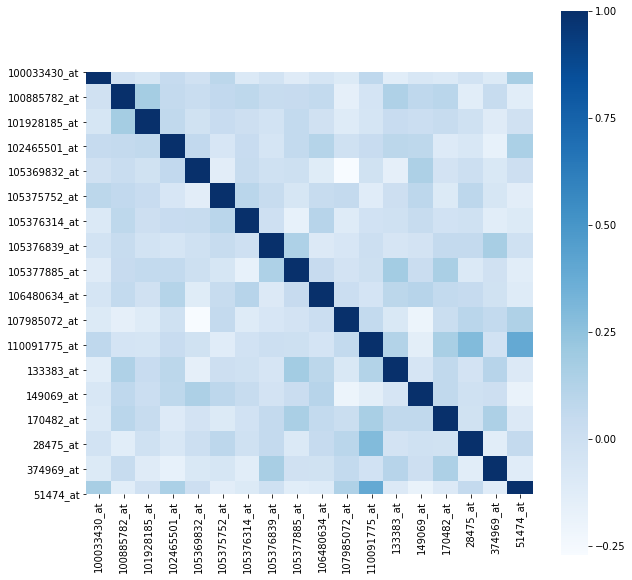

In [13]:
df = data.transpose()
df.corr()
cmap = sns.diverging_palette(10,220,sep=80, as_cmap=True)
fig = plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap="Blues",square=True)
plt.show()